# Proyecto 1
### Explorando los Algoritmos de Aprendizaje Supervisado

Estudiantes: 

Carlos Adrián Araya Ramírez---------2018319701

Michael Shakime Richards Sparks----2018170667

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import seaborn as sns

# ANÁLISIS

In [2]:
# Load the architecture 1 notes dataset
df = pd.read_csv("datasets/DataSetGrades/notas_arqui1.csv")
df

,Proyecto 1,Proyecto 2,Examen 1,Tarea 1,Final
0,100.0,100.0,53.3,76.0,80
1,0.0,0.0,12.6,0.0,5
2,100.0,45.0,49.6,100.0,80
3,0.0,0.0,0.0,0.0,0
4,100.0,100.0,61.6,66.7,80
...,...,...,...,...,...
100,59.3,100.0,61.0,70.0,85
101,66.3,100.0,100.0,88.3,85
102,54.4,100.0,100.0,100.0,85
103,72.0,100.0,100.0,100.0,85


In [3]:
df.describe()

,Proyecto 1,Proyecto 2,Examen 1,Tarea 1,Final
count,105.000000,105.000000,105.000000,105.00000,105.000000
mean,56.700952,61.665714,47.039048,48.18000,64.285714
std,30.273584,33.452805,28.839181,35.41112,28.168693
min,0.000000,0.000000,0.000000,0.00000,0.000000
25%,38.000000,53.400000,28.800000,14.70000,60.000000
50%,56.100000,65.000000,42.200000,48.00000,75.000000
75%,82.000000,95.000000,66.300000,76.00000,80.000000
max,100.000000,100.000000,100.000000,100.00000,100.000000


In [4]:
# Replace Final grades with 0 or 1
# 0 = No pasa el curso
# 1 = Pasa el curso

df['Final'] = df['Final'].apply(lambda x: 1 if x > 67.5 else 0)
df.head(25)

,Proyecto 1,Proyecto 2,Examen 1,Tarea 1,Final
0,100.0,100.0,53.3,76.0,1
1,0.0,0.0,12.6,0.0,0
2,100.0,45.0,49.6,100.0,1
3,0.0,0.0,0.0,0.0,0
4,100.0,100.0,61.6,66.7,1
5,42.5,60.0,55.1,24.0,1
6,45.3,60.0,38.5,48.0,1
7,100.0,60.0,57.0,0.0,1
8,80.0,100.0,52.4,66.7,1
9,79.3,62.0,40.3,48.0,1


<AxesSubplot:>

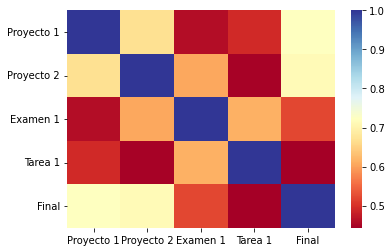

In [5]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='RdYlBu')

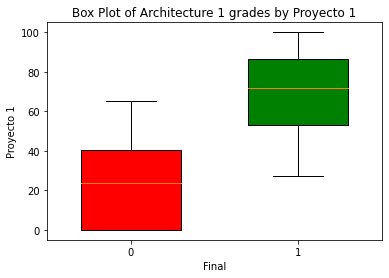

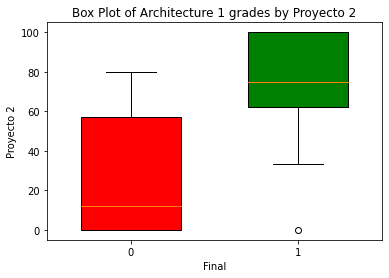

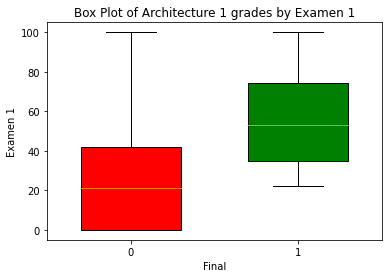

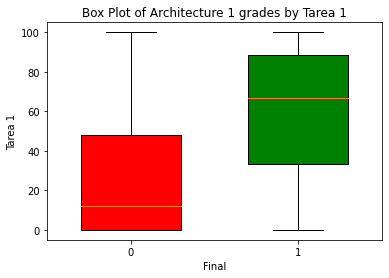

In [6]:
# Get the list of features
features = df.columns[:-1]

# Define colors for each Final value
colors = {0: 'red', 1: 'green'}

# Create a box plot for each feature
for feature in features:
    # Create a new figure and axis for each feature
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Loop through each quality value and plot the box
    for final in sorted(df['Final'].unique()):
        box_color = colors[final]  # Get the color for this quality value
        data = df[df['Final'] == final][feature]  # Get the data for this quality value
        ax.boxplot(data, positions=[final], widths=0.6, showfliers=True, patch_artist=True, boxprops=dict(facecolor=box_color))
    
    # Set the title and axis labels
    plt.title("Box Plot of Architecture 1 grades by " + feature)
    plt.xlabel("Final")
    plt.ylabel(feature)
    
    # Set the x-axis limits and ticks
    ax.set_xlim(-0.5, 1.5)
    ax.set_xticks(range(0, 2))
    ax.set_xticklabels(range(0, 2))
    
    # Remove the grid lines
    ax.grid(False)
    
    # Show the plot
    plt.show()

# NORMALIZACIÓN

In [7]:
from sklearn.preprocessing import MinMaxScaler

""" Remove outliers, this values skew the mean and standard deviation, resulting in normalization that 
is not representative of the majority of the data points. """

# Get the interquartile range for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Get the lower and upper bounds for each column
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Replace the values that are outside the interquartile range with the respective bound
df_iqr = df.clip(lower=lower, upper=upper, axis=1)

# Remove the values that are outside the interquartile range
# df_iqr = df[(df >= lower) & (df <= upper)].dropna()

""" Normalize using MinMaxScaler method. """

# Create a copy of the dataframe without the quality feature
df_to_normalize = df_iqr.iloc[:, :-1]

# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the df_to_normalize dataset
scaler.fit(df_to_normalize)

# Transform the df_without_quality dataset using the scaler
df_normalized = pd.DataFrame(scaler.transform(df_to_normalize), columns=df_to_normalize.columns)

# Add the quality feature of the original dataframe to the normalized dataframe
df_normalized['Final'] = df['Final']

df_normalized

,Proyecto 1,Proyecto 2,Examen 1,Tarea 1,Final
0,1.000,1.00,0.533,0.760,1
1,0.000,0.00,0.126,0.000,0
2,1.000,0.45,0.496,1.000,1
3,0.000,0.00,0.000,0.000,0
4,1.000,1.00,0.616,0.667,1
...,...,...,...,...,...
100,0.593,1.00,0.610,0.700,1
101,0.663,1.00,1.000,0.883,1
102,0.544,1.00,1.000,1.000,1
103,0.720,1.00,1.000,1.000,1


# PREPROCESAMIENTO

In [8]:
from collections import Counter
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split

# Divides the "quality" column into two categories using bins and labels.
bins = [0, 0.5, 1]
labels = ["REPROBADO", "APROBADO"]
df_normalized["Final"] = pd.cut(df_normalized["Final"], bins=bins, labels=labels)

# # show the updated dataframe
# print(df_normalized["quality"].value_counts())
# print()

# Converting the categorical labels in the "quality" column of the normalized dataset to numerical values.
lb = LabelEncoder()
df_normalized["Final"] = lb.fit_transform(df_normalized["Final"])
x = df_normalized.drop("Final", axis=1)
y = df_normalized["Final"]

# Splits the dataset into training and testing sets using train_test_split (stratifying based on the "quality" variable)
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.15, random_state=21, stratify=y)


# MODELOS
Evaluar de manera objetiva 3 algoritmos de aprendizaje supervisado